In [37]:
#import pandas library for working with dataset
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
#read in csv churn file
df = pd.read_csv("C:/Users/sered/OneDrive/Desktop/WGU Masters Degree/D212/churn_clean.csv")
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [4]:
#Eplore the dataset to better understand the columns

df.shape

(10000, 50)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [6]:
#Preprocessing Steps
#Select only the numberical data from the dataset
df = df.select_dtypes(exclude= 'object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Zip                   10000 non-null  int64  
 2   Lat                   10000 non-null  float64
 3   Lng                   10000 non-null  float64
 4   Population            10000 non-null  int64  
 5   Children              10000 non-null  int64  
 6   Age                   10000 non-null  int64  
 7   Income                10000 non-null  float64
 8   Outage_sec_perweek    10000 non-null  float64
 9   Email                 10000 non-null  int64  
 10  Contacts              10000 non-null  int64  
 11  Yearly_equip_failure  10000 non-null  int64  
 12  Tenure                10000 non-null  float64
 13  MonthlyCharge         10000 non-null  float64
 14  Bandwidth_GB_Year     10000 non-null  float64
 15  Item1               

In [7]:
#Remove the descrete numerical variables from the remaining columns so that only continuous variables remain
df = df.drop(['CaseOrder','Zip','Population','Children','Age','Email','Contacts','Yearly_equip_failure','Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Lat                 10000 non-null  float64
 1   Lng                 10000 non-null  float64
 2   Income              10000 non-null  float64
 3   Outage_sec_perweek  10000 non-null  float64
 4   Tenure              10000 non-null  float64
 5   MonthlyCharge       10000 non-null  float64
 6   Bandwidth_GB_Year   10000 non-null  float64
dtypes: float64(7)
memory usage: 547.0 KB


In [8]:
#Normalize the data to avoid data skewing
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data

array([[ 3.21740984, -2.8104319 , -0.39877774, ..., -1.04874621,
        -0.00394256, -1.13848703],
       [ 1.0246907 ,  0.43164437, -0.64195445, ..., -1.26200116,
         1.6303259 , -1.18587584],
       [ 1.21357022, -2.14207931, -1.07088496, ..., -0.7099398 ,
        -0.29522482, -0.61213775],
       ...,
       [-0.59538486, -0.63734869,  0.21903654, ...,  0.48751337,
        -0.06172934,  0.35098358],
       [-0.95223392,  0.37281313, -0.82058767, ...,  1.38301834,
         1.86300465,  1.40771348],
       [-0.74483171,  0.47811762, -1.09176018, ...,  1.09012007,
         1.04467151,  1.12816258]])

In [9]:
#Put normalized data array into a dataframe to perform analysis
scaled_df = pd.DataFrame(scaled_data, columns = df.columns)
scaled_df.to_csv('C:/Users/sered/OneDrive/Desktop/WGU Masters Degree/D212/Assessment 2/Scaled_Processed_Data.csv')
scaled_df.head()

,Lat,Lng,Income,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,3.217410,-2.810432,-0.398778,-0.679978,-1.048746,-0.003943,-1.138487
1,1.024691,0.431644,-0.641954,0.570331,-1.262001,1.630326,-1.185876
2,1.213570,-2.142079,-1.070885,0.252347,-0.709940,-0.295225,-0.612138
3,-1.065031,-1.746273,-0.740525,1.650506,-0.659524,-1.226521,-0.561857
4,-1.724710,-0.331512,0.009478,-0.623156,-1.242551,-0.528086,-1.428184


In [10]:
#Verify that the data scaled correctly
scaled_df.describe().round(2)

,Lat,Lng,Income,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.82,-5.34,-1.40,-3.33,-1.27,-2.16,-1.48
25%,-0.63,-0.42,-0.73,-0.67,-1.01,-0.76,-0.99
50%,0.12,0.19,-0.24,0.01,0.03,-0.12,-0.05
75%,0.62,0.71,0.48,0.66,1.02,0.65,1.00
max,5.86,1.66,7.77,3.77,1.42,2.74,1.72


In [11]:
scaled_df.shape

(10000, 7)

In [26]:
#Fit and transform the pca model
pca = PCA()
PC= pca.fit_transform(scaled_df)

In [27]:
#Create Loading Matrix
loading_matrix = pd.DataFrame(pca.components_, columns = df.columns, index = ('PC1','PC2','PC3','PC4','PC5','PC6','PC7'))
loading_matrix

,Lat,Lng,Income,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
PC1,-0.023929,0.007948,0.003751,0.005784,0.705612,0.040770,0.706941
PC2,0.699473,-0.706476,0.072029,-0.026424,0.020180,-0.071391,0.015428
PC3,-0.122083,0.003629,0.330376,-0.687545,0.038144,-0.633843,-0.001818
PC4,0.024641,0.072063,0.904620,0.045709,-0.028709,0.415871,-0.000478
PC5,-0.034349,0.030741,0.257294,0.721765,0.034436,-0.639926,-0.006245
PC6,-0.702476,-0.703332,0.033327,0.059290,-0.014295,0.083492,-0.007080
PC7,0.001028,0.000755,-0.001254,0.000025,-0.705716,-0.045372,0.707038


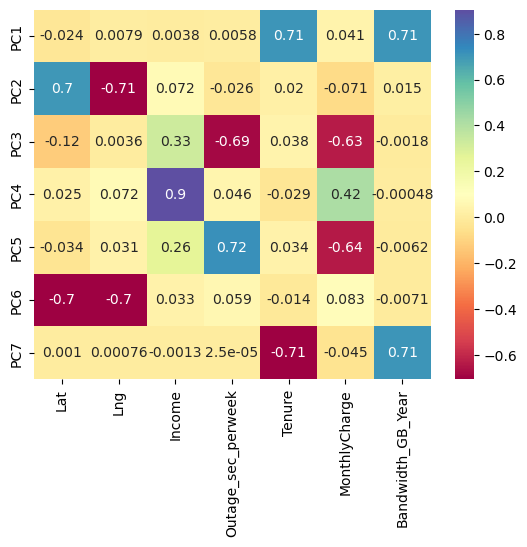

In [63]:
#Create heat map to view the matrix with more detail
matrix = sns.heatmap(loading_matrix, annot=True, cmap='Spectral')
plt.show()

In [28]:
#transform pca into ratio for visual analysis and testing
ratio = pca.explained_variance_ratio_
ratio

array([0.28482577, 0.15730985, 0.14634016, 0.14256851, 0.1397677 ,
       0.12826582, 0.00092219])

In [42]:
#Create an array with pca components
comp = np.arange(pca.n_components_)
comp

array([0, 1, 2, 3, 4, 5, 6])

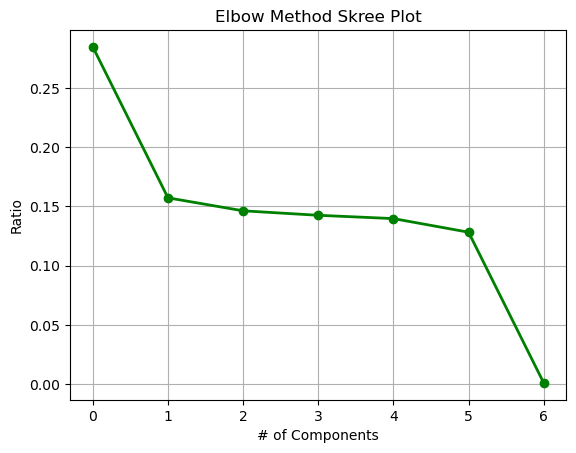

In [43]:
#Create plot for elbow method to determine significant principal components
plt.plot(comp,
         ratio,
         'o-',
        linewidth=2,
        color='green')
plt.title('Elbow Method Skree Plot')
plt.xlabel('# of Components')
plt.ylabel('Ratio')
plt.grid()
plt.show()

In [51]:
#Use Kaiser Method to determine most significant components
var = pca.explained_variance_
var

array([1.9939798 , 1.10127908, 1.02448354, 0.9980794 , 0.97847176,
       0.89795055, 0.00645594])

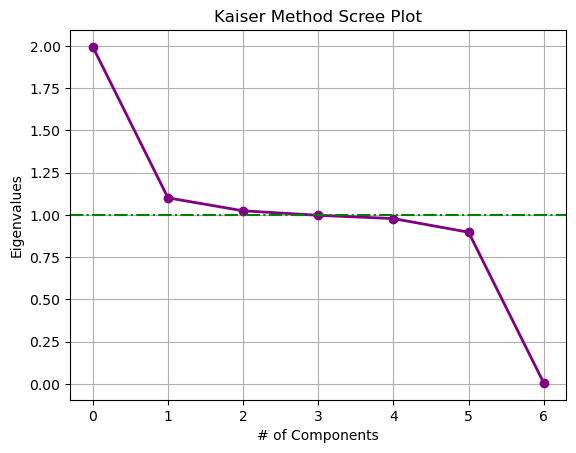

In [54]:
plt.plot(comp,
         var,
         'o-',
         linewidth=2,
         color='purple')
plt.title('Kaiser Method Scree Plot')
plt.xlabel('# of Components')
plt.ylabel('Eigenvalues')
plt.axhline(y = 1, color='green', linestyle='dashdot')
plt.grid()
plt.show()

In [58]:
#Based on the elbow method PC1-PC4 are the most significant
print(dict(zip(['PC1', 'PC2','PC3','PC4'], comp)))

{'PC1': 0, 'PC2': 1, 'PC3': 2, 'PC4': 3}


In [61]:
#Print variance of the first PC
print("Variance of First Four Principal Component:", pca.explained_variance_[:4])

Variance of First Four Principal Component: [1.9939798  1.10127908 1.02448354 0.9980794 ]


In [62]:
#determine total variance of the pc
total_variance_captured = np.sum(pca.explained_variance_ratio_[:4])
total_variance_captured

0.731044291439257